<a href="https://colab.research.google.com/github/sammainahkinya1404/Programming-Reboot/blob/main/K_MEANS_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from sklearn.cluster import KMeans
import numpy as np

# Generating some sample data
data = np.array([
    [1, 2], [1, 4], [1, 0],
    [4, 2], [4, 4], [4, 0]
])

# Applying K-Means clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0).fit(data)

# Cluster centers and labels
print("Cluster centers:", kmeans.cluster_centers_)
print("Labels:", kmeans.labels_)


Cluster centers: [[1. 2.]
 [4. 2.]]
Labels: [0 0 0 1 1 1]


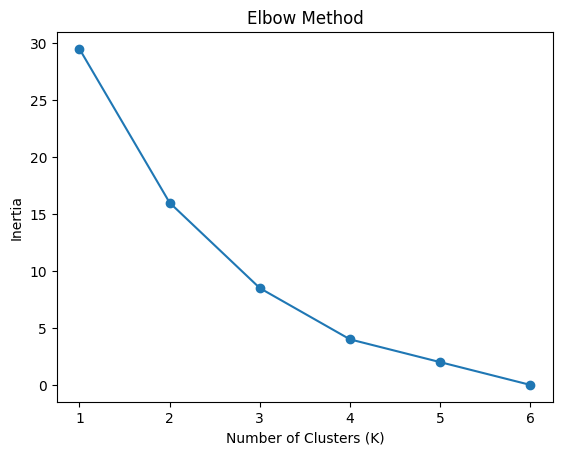

In [4]:
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

# Elbow Method
inertia = []
# Change the upper bound of the range to be the number of data points or less.
for k in range(1, 7):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(data)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow curve
plt.plot(range(1, 7), inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [5]:
from sklearn.metrics import silhouette_score

# Example with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0).fit(data)
labels = kmeans.labels_
score = silhouette_score(data, labels)

print("Silhouette Score for 2 clusters:", score)


Silhouette Score for 2 clusters: 0.2871407974806454


In [6]:
# Applying K-Means clustering with K-Means++ initialization
kmeans_plus = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(data)

# Cluster centers and labels
print("K-Means++ Cluster centers:", kmeans_plus.cluster_centers_)
print("Labels:", kmeans_plus.labels_)


K-Means++ Cluster centers: [[1. 2.]
 [4. 2.]]
Labels: [0 0 0 1 1 1]


In [8]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Load Iris dataset
iris = load_iris()
X = iris.data

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means
kmeans_iris = KMeans(n_clusters=3, random_state=0).fit(X_scaled)
print("Cluster centers (Iris):", kmeans_iris.cluster_centers_)


Cluster centers (Iris): [[-0.05021989 -0.88337647  0.34773781  0.2815273 ]
 [-1.01457897  0.85326268 -1.30498732 -1.25489349]
 [ 1.13597027  0.08842168  0.99615451  1.01752612]]


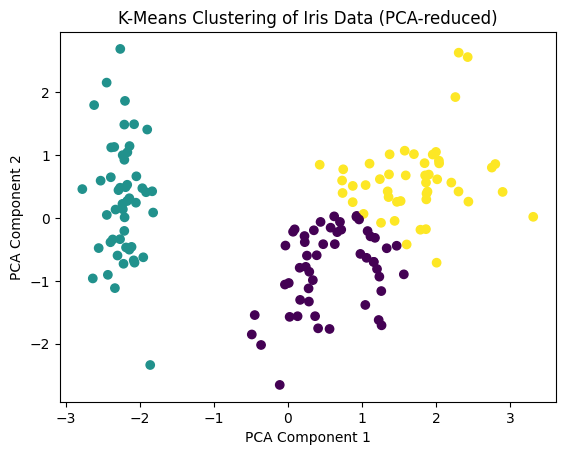

In [9]:
from sklearn.decomposition import PCA

# Reduce to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_iris.labels_, cmap='viridis')
plt.title('K-Means Clustering of Iris Data (PCA-reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


In [10]:
from sklearn.metrics import davies_bouldin_score

# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(X_scaled, kmeans_iris.labels_)
print("Davies-Bouldin Index:", db_index)

# Inertia and silhouette score
inertia = kmeans_iris.inertia_
silhouette = silhouette_score(X_scaled, kmeans_iris.labels_)

print("Inertia:", inertia)
print("Silhouette Score:", silhouette)


Davies-Bouldin Index: 0.8335949464754338
Inertia: 139.82049635974974
Silhouette Score: 0.45994823920518635


In [11]:
# Example: Anomaly Detection
from sklearn.datasets import make_blobs

# Creating a dataset with outliers
X_outliers, _ = make_blobs(n_samples=50, centers=1, cluster_std=1.0, random_state=0)
X_outliers = np.append(X_outliers, [[8, 8]], axis=0)

# Clustering to detect anomalies
kmeans_outliers = KMeans(n_clusters=2).fit(X_outliers)
print("Labels with anomalies:", kmeans_outliers.labels_)


Labels with anomalies: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
